In [11]:
from embeddings.dataset.tno_dataset_collection import TnoDatasetCollection
from embeddings.dataset.emission_field_transforms import RandomSparseEmittersTransform
import matplotlib.pyplot as plt
from embeddings.common.gnfr_sector import GnfrSector
from embeddings.plotting.city_emission_field_plot import plot_emission_field

In [12]:
CITY = "Munich"

In [13]:
dataset_collection = TnoDatasetCollection()

data = dataset_collection.get_case_study_data(CITY, year=2015)
data.disable_temporal_transforms()
data.add_sampling_transform(RandomSparseEmittersTransform(lam=100))

[INFO] > Loading TNO data from '/home/must1d/Repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2015_highres_by_city.csv'
[INFO] > Loading TNO data from '/home/must1d/Repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2018_highres_by_city.csv'
[INFO] > Test Set has 13 unique cites!                           
	Gdynia, Großzschocher, Hamburg, Duisburg, Siegen, Innsbruck, Dresden, Győr, Reims, Magdeburg, Szczecin, Prague, Aachen
[INFO] > Validation Set has 15 unique cites!
	Nijmegen, Zielona Góra, Kalisz, Koblenz, Linz, Wałbrzych, Bydgoszcz, Bielefeld, Frankfurt am Main, Ingolstadt, Southampton, Erfurt, Brussels, Kassel, Angers
[INFO] > Training Set has 74 unique cites!
	Kiel, Groningen, Eindhoven, Enschede, Salzburg, Antwerpen, Charleroi, Nürnberg, Liberec, Brighton, Metz, Nancy, Norwich, Sheffield, Rostock, Apeldoorn, Wrocław, Copenhagen, Berlin, Freiburg, Nantes, Pilsen, Southend-on-Sea, Lille, Mannheim, Orléans, Chemnitz, Kingston upon H

In [14]:
emission_field = data.get_city_emission_field(0, apply_sampling_transforms=False)
vmax = 1.1 * emission_field.co2_ff_field.max()

emission_field_transformed = data.get_city_emission_field(0, apply_sampling_transforms=True)
vmax_transformed = 1.1 * emission_field_transformed.co2_ff_field.max()

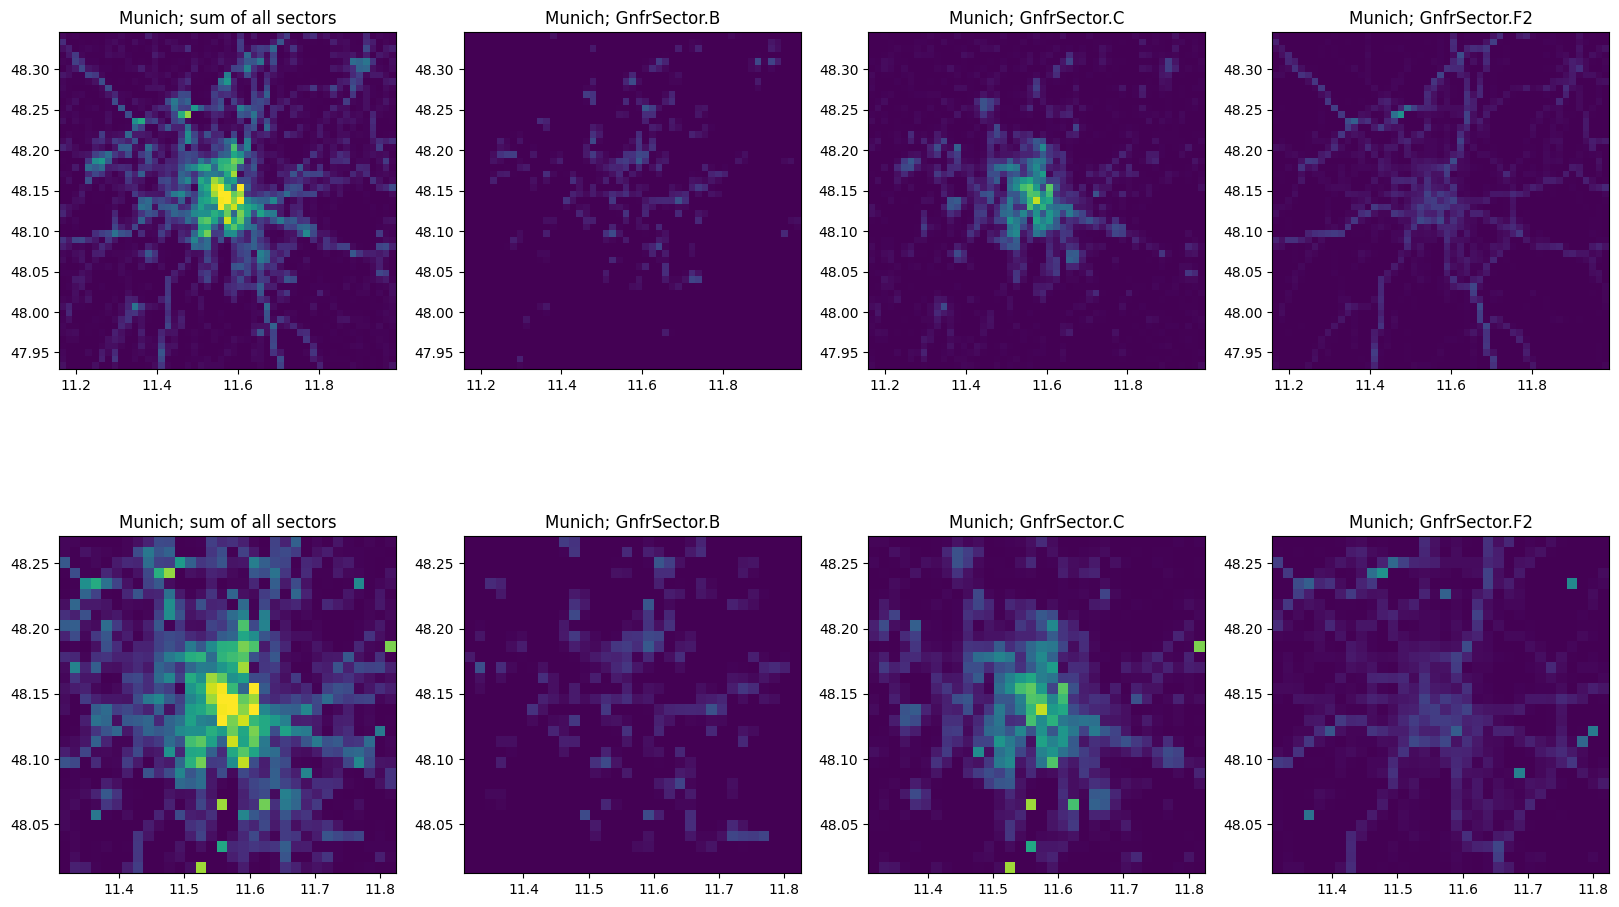

In [15]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 12))

plot_emission_field(emission_field=emission_field, ax=ax1, vmax=vmax)
plot_emission_field(emission_field=emission_field, ax=ax2, sector=GnfrSector.B, vmax=vmax)
plot_emission_field(emission_field=emission_field, ax=ax3, sector=GnfrSector.C, vmax=vmax)
plot_emission_field(emission_field=emission_field, ax=ax4, sector=GnfrSector.F2, vmax=vmax)

plot_emission_field(emission_field=emission_field_transformed, ax=ax5, vmax=vmax)
plot_emission_field(emission_field=emission_field_transformed, ax=ax6, sector=GnfrSector.B, vmax=vmax)
plot_emission_field(emission_field=emission_field_transformed, ax=ax7, sector=GnfrSector.C, vmax=vmax)
plot_emission_field(emission_field=emission_field_transformed, ax=ax8, sector=GnfrSector.F2, vmax=vmax)